1. Importando bibliotecas e montando o Google Drive:

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Montando o Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Carregando e transformando o dataset:

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# salvando dataframe via html
url = 'https://servicebus2.caixa.gov.br/portaldeloterias/api/resultados?modalidade=Lotofacil'
resultados = pd.read_html(url, encoding='utf-8')[0]
resultados.head(2)

,\r\nConcurso\r\n,\r\nData_Sorteio\r\n,\r\nBola1\r\n,\r\nBola2\r\n,\r\nBola3\r\n,\r\nBola4\r\n,\r\nBola5\r\n,\r\nBola6\r\n,\r\nBola7\r\n,\r\nBola8\r\n,...,\r\nGanhadores_12_Números\r\n,\r\nGanhadores_11_Números\r\n,\r\nValor_Rateio_15_Números\r\n,\r\nValor_Rateio_14_Números\r\n,\r\nValor_Rateio_13_Números\r\n,\r\nValor_Rateio_12_Números\r\n,\r\nValor_Rateio_11_Números\r\n,\r\nAcumulado_15_Números\r\n,\r\nEstimativa_Prêmio\r\n,\r\nValor_Acumulado_Especial\r\n
0,1,29/09/2003,2.0,3.0,5.0,6.0,9.0,10.0,11.0,13.0,...,48807.0,257593.0,"R$49.765,82","R$689,84","R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00"
1,NaN,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# limpando \r\n dos dados
resultados = resultados.replace(r'\\r\\n','', regex=True)
resultados.columns = [col.replace(r'\r\n','') for col in resultados.columns]

# limpando linhas que não são resultados de concurso
resultados = resultados[resultados['Concurso'].str.contains(r'[0-9]{1,4}', na=False)]

# salvando em um excel
resultados.to_excel('resultados_lotofacil.xlsx', index=False)

resultados.head()

,Concurso,Data_Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Ganhadores_12_Números,Ganhadores_11_Números,Valor_Rateio_15_Números,Valor_Rateio_14_Números,Valor_Rateio_13_Números,Valor_Rateio_12_Números,Valor_Rateio_11_Números,Acumulado_15_Números,Estimativa_Prêmio,Valor_Acumulado_Especial
0,1,29/09/2003,2.0,3.0,5.0,6.0,9.0,10.0,11.0,13.0,...,48807.0,257593.0,"R$49.765,82","R$689,84","R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00"
4,2,06/10/2003,1.0,4.0,5.0,6.0,7.0,9.0,11.0,12.0,...,81252.0,478188.0,"R$596.323,70","R$1.388,95","R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00"
6,3,13/10/2003,1.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,...,96244.0,608211.0,"R$400.623,70","R$2.173,36","R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00"
8,4,20/10/2003,1.0,2.0,4.0,5.0,8.0,10.0,12.0,13.0,...,123912.0,706657.0,"R$902.226,02","R$1.498,72","R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00"
10,5,27/10/2003,1.0,2.0,4.0,8.0,9.0,11.0,12.0,13.0,...,195636.0,860992.0,"R$380.017,55","R$687,49","R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00"


In [6]:
df = pd.read_excel('resultados_lotofacil.xlsx')
df['data_sorteio_conv'] = df.iloc[:,1]

df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)
df['day'] = df['data_sorteio_conv'].dt.day
df['month'] = df['data_sorteio_conv'].dt.month
df['year'] = df['data_sorteio_conv'].dt.year

# Visualizando os dados
df.head()

<ipython-input-6-2d8b09d90f58>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)


,Concurso,Data_Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Valor_Rateio_13_Números,Valor_Rateio_12_Números,Valor_Rateio_11_Números,Acumulado_15_Números,Estimativa_Prêmio,Valor_Acumulado_Especial,data_sorteio_conv,day,month,year
0,1,29/09/2003,2,3,5,6,9,10,11,13,...,"R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00",2003-09-29,29,9,2003
1,2,06/10/2003,1,4,5,6,7,9,11,12,...,"R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00",2003-06-10,10,6,2003
2,3,13/10/2003,1,4,6,7,8,9,10,11,...,"R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00",2003-10-13,13,10,2003
3,4,20/10/2003,1,2,4,5,8,10,12,13,...,"R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00",2003-10-20,20,10,2003
4,5,27/10/2003,1,2,4,8,9,11,12,13,...,"R$10,00","R$4,00","R$2,00","R$0,00","R$0,00","R$0,00",2003-10-27,27,10,2003


3.  Pré-processamento dos dados



<ipython-input-7-7f401adf6ee2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nn.loc[df_nn['ganhadores_15_números'] > 0, 'ganhadores_15_números'] = 1


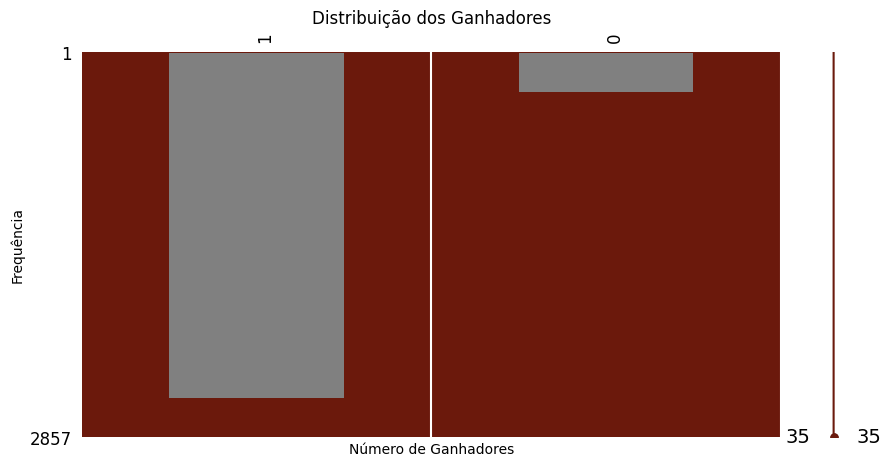

In [7]:
# Removendo valores nulos
df_clean = df.dropna(subset=['Concurso'])

# Removendo colunas irrelevantes
df_clean = df_clean.drop(['Cidade'], axis=1)

# Visualizando o dataset limpo
msno.matrix(df_clean, figsize=(20, 5), color=(0.42, 0.1, 0.05))

# Selecionando as colunas relevantes para o modelo
df_nn = df_clean[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 'Bola7', 'Bola8', 'Bola9', 'Bola10',
                  'Bola11', 'Bola12', 'Bola13', 'Bola14', 'Bola15', 'Ganhadores_15_Números']]

# Ajustando o nome das colunas
df_nn.columns = map(str.lower, df_nn.columns)

# Tratando os casos de múltiplos ganhadores
df_nn.loc[df_nn['ganhadores_15_números'] > 0, 'ganhadores_15_números'] = 1

# Verificando a distribuição dos ganhadores
df_nn['ganhadores_15_números'].value_counts().plot(kind='bar', figsize=(10, 5), color='gray', fontsize=12)
plt.title('Distribuição dos Ganhadores')
plt.xlabel('Número de Ganhadores')
plt.ylabel('Frequência')
plt.show()

# Dividindo o dataset em features e target
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]


#Algoritmo Análise de Discriminante Linear

Proporção de Variância Explicada:
Componente 1: 100.00%


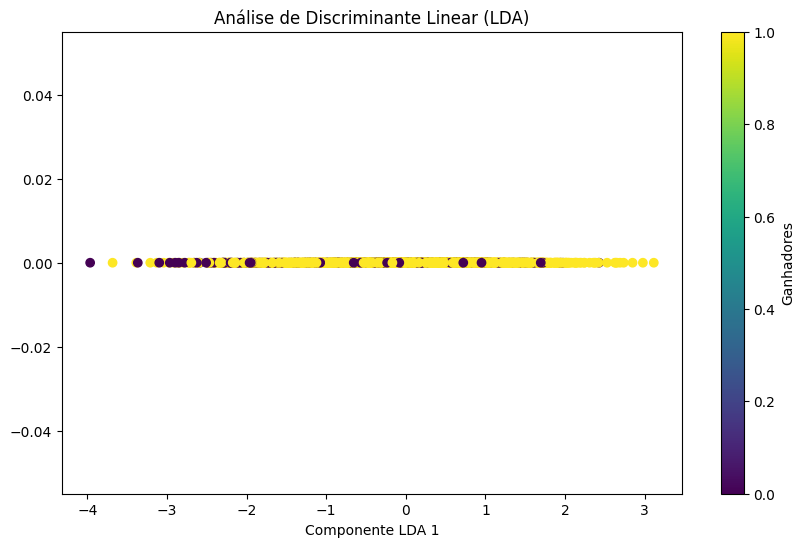

Probabilidade de 99% -> Dezenas: [2, 4, 5, 7, 9, 10, 13, 14, 15, 18, 20, 21, 22, 23, 24]
Probabilidade de 98% -> Dezenas: [1, 3, 5, 9, 10, 11, 13, 17, 18, 19, 21, 22, 23, 24, 25]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Algoritmo Análise de Discriminante Linear
lda = LinearDiscriminantAnalysis()
lda.fit(features, target)

# Transformando as features utilizando o modelo LDA
features_lda = lda.transform(features)

# Verificando a proporção de variância explicada pela componente LDA
explained_variance_ratio = lda.explained_variance_ratio_

# Imprimindo a proporção de variância explicada
print("Proporção de Variância Explicada:")
for i, ratio in enumerate(explained_variance_ratio):
    print("Componente {}: {:.2f}%".format(i+1, ratio*100))

# Verificando o número de componentes LDA
num_components = features_lda.shape[1]

if num_components >= 1:
    # Plotando a primeira componente LDA
    plt.figure(figsize=(10, 6))
    plt.scatter(features_lda[:, 0], np.zeros_like(features_lda[:, 0]), c=target, cmap='viridis')
    plt.xlabel('Componente LDA 1')
    plt.title('Análise de Discriminante Linear (LDA)')
    plt.colorbar(label='Ganhadores')
    plt.show()
else:
    print("Não é possível plotar a primeira componente LDA.")

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9',
                           'bola10', 'bola11', 'bola12', 'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(lda.predict_proba([dezenas])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(lda.predict_proba([dezenas_random])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))

In [ ]:
from sklearn.neural_network import MLPClassifier

# Algoritmo de Redes Neurais Profundas
dnn = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000)
dnn.fit(features, target)

# Transformando as features utilizando o modelo DNN
features_dnn = dnn.predict_proba(features)

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9',
                           'bola10', 'bola11', 'bola12', 'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(dnn.predict_proba([dezenas])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(dnn.predict_proba([dezenas_random])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))


Probabilidade de 99% -> Dezenas: [1, 3, 4, 5, 7, 8, 9, 15, 16, 18, 19, 21, 23, 24, 25]
Probabilidade de 28% -> Dezenas: [1, 4, 5, 6, 7, 8, 10, 12, 13, 14, 17, 19, 22, 24, 25]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPCl

#Redes Neurais Profundas:

Epoch 1/200
72/72 [==============================] - 1s 4ms/step - loss: 0.5850 - accuracy: 0.8485 - val_loss: 0.2946 - val_accuracy: 0.9194
Epoch 2/200
72/72 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8853 - val_loss: 0.3474 - val_accuracy: 0.9194
Epoch 3/200
72/72 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8901 - val_loss: 0.3267 - val_accuracy: 0.9194
Epoch 4/200
72/72 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8905 - val_loss: 0.2921 - val_accuracy: 0.9194
Epoch 5/200
72/72 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8914 - val_loss: 0.2991 - val_accuracy: 0.9194
Epoch 6/200
72/72 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8919 - val_loss: 0.2854 - val_accuracy: 0.9194
Epoch 7/200
72/72 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8914 - val_loss: 0.2836 - val_accuracy: 0.9194
Epoch 8/200
7

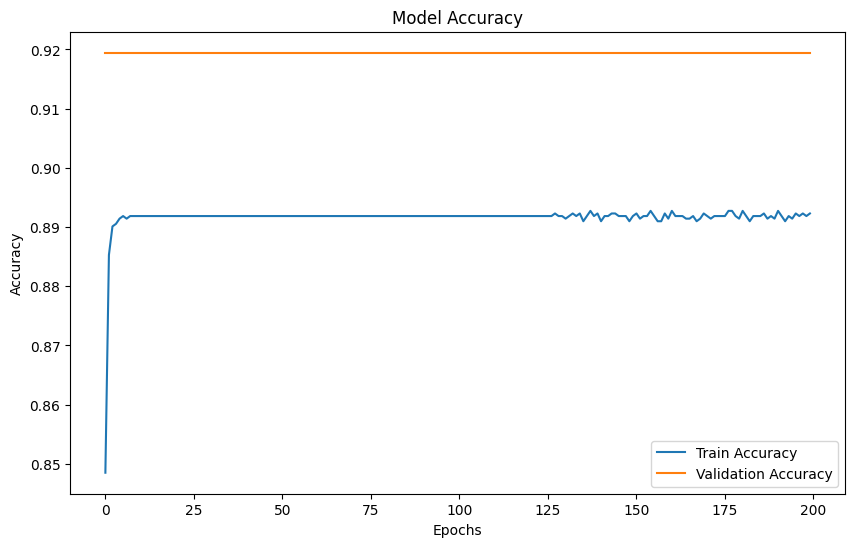

1/1 [==============================] - 0s 18ms/step
Probabilidade de 98% -> Dezenas: [1, 2, 6, 8, 9, 10, 12, 15, 16, 17, 20, 22, 23, 24, 25]
1/1 [==============================] - 0s 20ms/step
Probabilidade de 99% -> Dezenas: [1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 15, 17, 20, 21, 25]


In [ ]:
from sklearn.metrics import accuracy_score

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Criando o modelo de Redes Neurais Profundas
model = Sequential()
model.add(Dense(64, input_dim=15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

# Avaliando o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Plotando a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gerando código para prever a probabilidade de acerto de uma sequência de dezenas
def generate_code(numbers):
    probabilities = model.predict(np.array(numbers).reshape(1, -1))
    prob_percent = round(probabilities[0][0] * 100, 2)
    print(f"Probabilidade de {prob_percent}% -> Dezenas: {numbers}")

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9',
                           'bola10', 'bola11', 'bola12', 'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 97
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(model.predict(np.array(dezenas).reshape(1, -1))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(model.predict(np.array(dezenas_random).reshape(1, -1))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))

Redes Neurais Recorrentes(RNN)

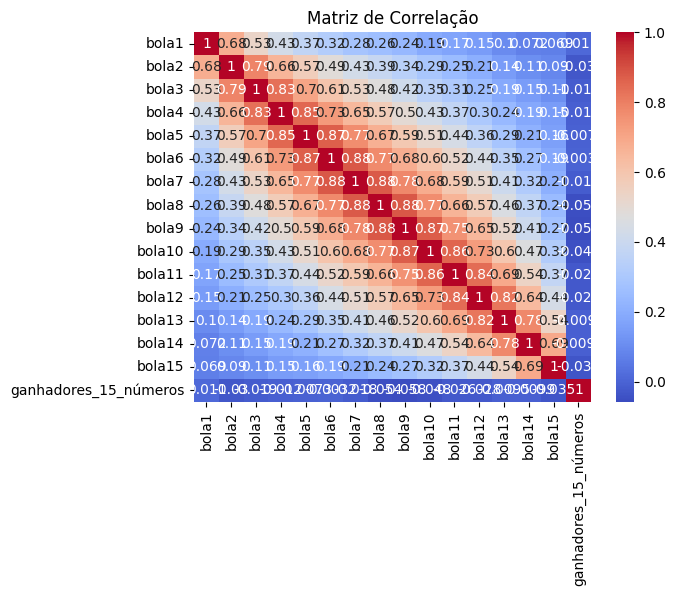

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 32ms/step


KeyboardInterrupt: ignored

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN
from sklearn.model_selection import train_test_split

# Algoritmo Análise de Correlação
correlation_matrix = df_nn.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.show()

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo
modelo = Sequential()
modelo.add(SimpleRNN(32, input_shape=(15, 1), activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo
modelo.fit(np.expand_dims(X_train, axis=2), y_train, epochs=200, batch_size=8, validation_data=(np.expand_dims(X_test, axis=2), y_test))
# modelo.fit(np.expand_dims(X_train, axis=2), y_train, epochs=500, batch_size=10, validation_data=(np.expand_dims(X_test, axis=2), y_test))

# Avaliando modelo
scores = modelo.evaluate(np.expand_dims(X_test, axis=2), y_test)
print("\nAcuracia do modelo")
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict(np.expand_dims(pd.DataFrame([dezenas]), axis=2))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(np.expand_dims(pd.DataFrame([dezenas_random]), axis=2))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))


Gradient Boosting LightGBM


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Algoritmo Análise de Correlação
correlation_matrix = df_nn.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.show()

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo LightGBM
modelo = lgb.LGBMClassifier()

# Treinando modelo
modelo.fit(X_train, y_train)

# Avaliando modelo
accuracy = modelo.score(X_test, y_test)
print("Acurácia do modelo:", accuracy)

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict_proba([dezenas])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict_proba([dezenas_random])[0][1] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))


NameError: ignored

Redes Neurais Generativas Adversariais

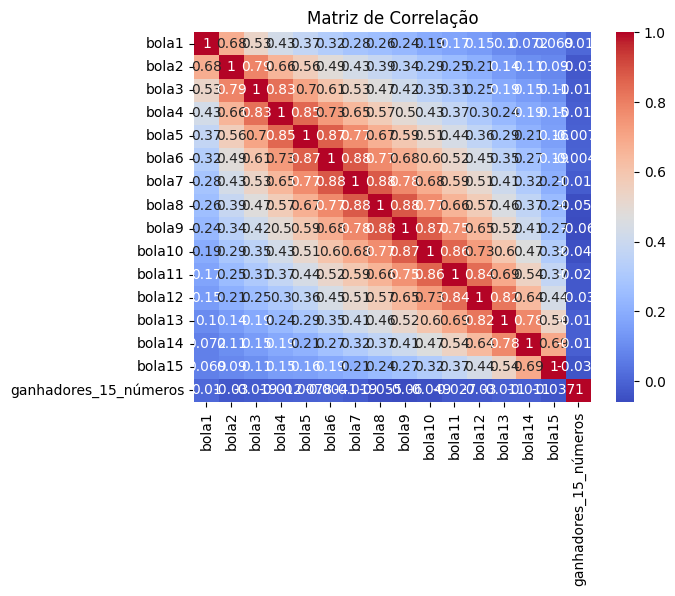

Epoch 1/500
192/192 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.8656 - val_loss: 0.3270 - val_accuracy: 0.9099
Epoch 2/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8907 - val_loss: 0.3040 - val_accuracy: 0.9099
Epoch 3/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8912 - val_loss: 0.3374 - val_accuracy: 0.9099
Epoch 4/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8912 - val_loss: 0.3027 - val_accuracy: 0.9099
Epoch 5/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8912 - val_loss: 0.3123 - val_accuracy: 0.9099
Epoch 6/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8912 - val_loss: 0.3020 - val_accuracy: 0.9099
Epoch 7/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8912 - val_loss: 0.3090 - val_accuracy: 0.9099

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Algoritmo Análise de Correlação
correlation_matrix = df_nn.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.show()

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=15, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo
modelo.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_test, y_test))

# Avaliando modelo
scores = modelo.evaluate(X_test, y_test)
print("\nAcuracia do modelo")
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99% e não tenha sido sorteado antes
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios até que não tenha sido sorteado antes
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
while dezenas_random in dezenas_sorteadas:
    dezenas_random = random.sample(range(1, 26), 15)

# Valida qual a probabilidade da sequência ser sorteada
probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))


Análise de Correlação

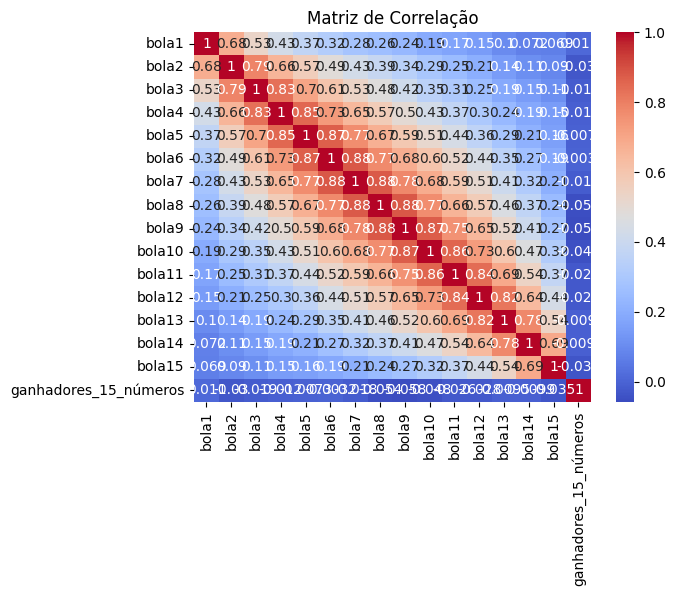

Epoch 1/100
240/240 [==============================] - 2s 5ms/step - loss: 0.4123 - accuracy: 0.8757 - val_loss: 0.3334 - val_accuracy: 0.9014
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3510 - accuracy: 0.8945 - val_loss: 0.3247 - val_accuracy: 0.9014
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8950 - val_loss: 0.3297 - val_accuracy: 0.9014
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3587 - accuracy: 0.8950 - val_loss: 0.3352 - val_accuracy: 0.9014
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3435 - accuracy: 0.8950 - val_loss: 0.3453 - val_accuracy: 0.9014
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3524 - accuracy: 0.8950 - val_loss: 0.3296 - val_accuracy: 0.9014
Epoch 7/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3485 - accuracy: 0.8950 - val_loss: 0.3212 - val_accuracy: 0.9014

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split



# Algoritmo Análise de Correlação
correlation_matrix = df_nn.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.show()

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=15, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo
# modelo.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_test, y_test))
modelo.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Avaliando modelo
scores = modelo.evaluate(X_test, y_test)
print("\nAcuracia do modelo")
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))

Analise descritiva

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random

np.random.seed(8)

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=15, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo
modelo.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_test, y_test))

# Avaliando modelo
scores = modelo.evaluate(X_test, y_test)
print("\nAcuracia do modelo")
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 99
probabilidade_atual = 0

# Gera sequencia de numeros até que a probabilidade seja maior ou igual a 99%
while probabilidade_atual < probabilidade_boa:
    # Gera sequencia de números
    dezenas = random.sample(range(1, 26), 15)

    # Verifica se o número gerado já foi sorteado
    if dezenas not in dezenas_sorteadas:
        # Valida qual a probabilidade da sequência ser sorteada
        probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))

# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))
# Gera sequencia de números aleatórios
dezenas_random = random.sample(range(1, 26), 15)

# Verifica se o número gerado já foi sorteado
if dezenas_random not in dezenas_sorteadas:
    # Valida qual a probabilidade da sequência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))

# Algoritmo Análise Descritiva
# Calcula estatísticas descritivas sobre os resultados do algoritmo genético
resultado_descricao = modelo.predict(X_test)
resultado_descricao = pd.DataFrame(resultado_descricao, columns=['Resultado'])
descricao_estatistica = resultado_descricao.describe()

print("\nDescrição Estatística dos Resultados:")
print(descricao_estatistica)


Epoch 1/500
191/191 [==============================] - 2s 4ms/step - loss: 0.4046 - accuracy: 0.8878 - val_loss: 0.3355 - val_accuracy: 0.8947
Epoch 2/500
191/191 [==============================] - 1s 3ms/step - loss: 0.3497 - accuracy: 0.8983 - val_loss: 0.3469 - val_accuracy: 0.8947
Epoch 3/500
191/191 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8983 - val_loss: 0.3407 - val_accuracy: 0.8947
Epoch 4/500
191/191 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8988 - val_loss: 0.3360 - val_accuracy: 0.8947
Epoch 5/500
191/191 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8988 - val_loss: 0.3490 - val_accuracy: 0.8947
Epoch 6/500
191/191 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8988 - val_loss: 0.3379 - val_accuracy: 0.8947
Epoch 7/500
191/191 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8988 - val_loss: 0.3419 - val_accuracy: 0.8947

Algoritmo Genético Padrão: É a forma clássica do algoritmo genético, que utiliza seleção, recombinação (crossover) e mutação para evoluir uma população de soluções ao longo das gerações.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random

np.random.seed(8)

# Separando target e classes
features = df_nn.iloc[:, 0:15]
target = df_nn.iloc[:, 15]

# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=8)

# Criando modelo
modelo = Sequential()
modelo.add(Dense(32, input_dim=15, activation='relu'))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo
modelo.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_test, y_test))

# Avaliando modelo
scores = modelo.evaluate(X_test, y_test)
print("\nAcuracia do modelo")
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[
    ['bola1', 'bola2', 'bola3', 'bola4', 'bola5', 'bola6', 'bola7', 'bola8', 'bola9', 'bola10', 'bola11', 'bola12',
     'bola13', 'bola14', 'bola15']].values.tolist()

probabilidade_boa = 90
probabilidade_atual = 0

# Função para gerar uma população inicial
def gerar_populacao_inicial(tamanho_populacao, tamanho_cromossomo):
    populacao = []
    for _ in range(tamanho_populacao):
        cromossomo = random.sample(range(1, 26), tamanho_cromossomo)
        populacao.append(cromossomo)
    return populacao

# Função para avaliar a aptidão (probabilidade) de cada cromossomo
def avaliar_aptidao(populacao):
    aptidoes = []
    for cromossomo in populacao:
        if cromossomo not in dezenas_sorteadas:
            probabilidade = modelo.predict(pd.DataFrame([cromossomo]))[0][0]
            aptidoes.append(probabilidade)
        else:
            aptidoes.append(0)
    return aptidoes

# Função para selecionar os melhores cromossomos da população atual
def selecao(populacao, aptidoes, quantidade_selecionada):
    indices_selecionados = np.argsort(aptidoes)[-quantidade_selecionada:]
    return [populacao[i] for i in indices_selecionados]

# Função para realizar o crossover entre dois cromossomos
def crossover(cromossomo1, cromossomo2):
    ponto_corte = random.randint(1, len(cromossomo1) - 1)
    filho1 = cromossomo1[:ponto_corte] + cromossomo2[ponto_corte:]
    filho2 = cromossomo2[:ponto_corte] + cromossomo1[ponto_corte:]
    return filho1, filho2

# Função para realizar a mutação em um cromossomo
def mutacao(cromossomo, taxa_mutacao):
    for i in range(len(cromossomo)):
        if random.random() < taxa_mutacao:
            cromossomo[i] = random.randint(1, 25)
    return cromossomo

# Algoritmo genético
tamanho_populacao = 100
tamanho_cromossomo = 15
quantidade_selecionada = 20
taxa_mutacao = 0.1

populacao = gerar_populacao_inicial(tamanho_populacao, tamanho_cromossomo)

geracao = 1
while probabilidade_atual < probabilidade_boa:
    aptidoes = avaliar_aptidao(populacao)
    selecionados = selecao(populacao, aptidoes, quantidade_selecionada)

    if geracao % 10 == 0:
        melhor_aptidao = max(aptidoes)
        print("Melhor aptidão na geração {}: {:.2f}%".format(geracao, melhor_aptidao * 100))

    nova_populacao = selecionados.copy()

    while len(nova_populacao) < tamanho_populacao:
        pai1 = random.choice(selecionados)
        pai2 = random.choice(selecionados)
        filho1, filho2 = crossover(pai1, pai2)

        filho1 = mutacao(filho1, taxa_mutacao)
        filho2 = mutacao(filho2, taxa_mutacao)

        nova_populacao.append(filho1)
        nova_populacao.append(filho2)

    populacao = nova_populacao
    geracao += 1

    melhor_cromossomo = max(populacao, key=lambda cromossomo: modelo.predict(pd.DataFrame([cromossomo]))[0][0])
    probabilidade_atual = int(modelo.predict(pd.DataFrame([melhor_cromossomo]))[0][0] * 100)

print("Probabilidade de {0}% -> Dezenas: {1}".format(probabilidade_atual, sorted(melhor_cromossomo)))


Epoch 1/500
192/192 [==============================] - 3s 4ms/step - loss: 0.4734 - accuracy: 0.8619 - val_loss: 0.3038 - val_accuracy: 0.9099
Epoch 2/500
192/192 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8891 - val_loss: 0.3154 - val_accuracy: 0.9099
Epoch 3/500
192/192 [==============================] - 1s 3ms/step - loss: 0.3652 - accuracy: 0.8912 - val_loss: 0.3437 - val_accuracy: 0.9099
Epoch 4/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8912 - val_loss: 0.3318 - val_accuracy: 0.9099
Epoch 5/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8912 - val_loss: 0.3090 - val_accuracy: 0.9099
Epoch 6/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8912 - val_loss: 0.3332 - val_accuracy: 0.9099
Epoch 7/500
192/192 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8912 - val_loss: 0.3298 - val_accuracy: 0.9099